<a href="https://colab.research.google.com/github/anushkapandey123/Outliers_PES1UG20CS123_PES1UG20CS072/blob/main/EDA_Outliers_PES1UG20CS123_PES1UG20CS072.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DA PROJECT

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_reviews = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DA PROJECT/archive (1)/reviews.csv")
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DA PROJECT/archive (1)/listings.csv")
df_calendar = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DA PROJECT/archive (1)/calendar.csv")

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [ ]:
df.drop(['scrape_id'], axis = 1, inplace=True)


In [ ]:
df.isnull().sum()


id                                    0
listing_url                           0
last_scraped                          0
name                                  0
summary                             177
                                   ... 
cancellation_policy                   0
require_guest_profile_picture         0
require_guest_phone_verification      0
calculated_host_listings_count        0
reviews_per_month                   627
Length: 91, dtype: int64

In [ ]:
df.drop(['listing_url', 'summary', 'space'],axis = 1, inplace=True)


In [ ]:
df.head()

,id,last_scraped,name,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,2016-01-04,Stylish Queen Anne Apartment,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...,NaN,NaN,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,none,NaN,NaN,NaN,NaN,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,Belltown,The nearest public transit bus (D Line) is 2 b...,NaN,NaN,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [ ]:
df.drop(['last_scraped', 'experiences_offered'], axis=1, inplace=True)

In [ ]:
df.drop(['thumbnail_url'], axis=1, inplace=True)

In [ ]:
df.head()

,id,name,description,neighborhood_overview,notes,transit,medium_url,picture_url,xl_picture_url,host_id,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,Stylish Queen Anne Apartment,Make your self at home in this charming one-be...,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...,NaN,https://a2.muscache.com/ac/pictures/b4324e0f-a...,NaN,16708587,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,NaN,NaN,NaN,https://a0.muscache.com/ac/pictures/94146944/6...,NaN,9851441,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,We are in the beautiful neighborhood of Queen ...,Belltown,The nearest public transit bus (D Line) is 2 b...,NaN,https://a1.muscache.com/ac/pictures/6120468/b0...,NaN,1452570,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [ ]:
df.drop(['neighborhood_overview', 'notes', 'transit', 'medium_url', 'picture_url'], axis=1, inplace=True)

In [ ]:
df.drop(['xl_picture_url'], axis=1, inplace=True)

In [ ]:
df.head()

,id,name,description,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,Stylish Queen Anne Apartment,Make your self at home in this charming one-be...,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,16708587,https://www.airbnb.com/users/show/16708587,Jill,2014-06-12,"Seattle, Washington, United States",i love living in Seattle. i grew up in the mi...,within a few hours,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,9851441,https://www.airbnb.com/users/show/9851441,Emily,2013-11-06,"Seattle, Washington, United States",NaN,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,1452570,https://www.airbnb.com/users/show/1452570,Emily,2011-11-29,"Seattle, Washington, United States","Hi, I live in Seattle, Washington but I'm orig...",within an hour,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [ ]:
# filling the float values with mean
#df["reviews_per_month"] = df["reviews_per_month"].fillna(df["reviews_per_month"].mean())

df.reviews_per_month.fillna(method="ffill", inplace=True)
df.tail()

,id,name,description,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
3813,8101950,3BR Mountain View House in Seattle,Our 3BR/2BA house boasts incredible views of t...,31148752,https://www.airbnb.com/users/show/31148752,Bo,2015-04-13,US,NaN,within a few hours,...,8.0,f,NaN,WASHINGTON,f,strict,f,f,8,0.3
3814,8902327,Portage Bay View!-One Bedroom Apt,800 square foot 1 bedroom basement apartment w...,46566046,https://www.airbnb.com/users/show/46566046,Glen,2015-10-14,"Seattle, Washington, United States",I am a 58 year old male that is married to Mag...,within an hour,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,1,2.0
3815,10267360,Private apartment view of Lake WA,"Very comfortable lower unit. Quiet, charming m...",52791370,https://www.airbnb.com/users/show/52791370,Virginia,2015-12-30,US,NaN,NaN,...,NaN,f,NaN,WASHINGTON,f,moderate,f,f,1,2.0
3816,9604740,Amazing View with Modern Comfort!,Cozy studio condo in the heart on Madison Park...,25522052,https://www.airbnb.com/users/show/25522052,Karen,2015-01-03,"Tacoma, Washington, United States",NaN,within an hour,...,NaN,f,NaN,WASHINGTON,f,moderate,f,f,1,2.0
3817,10208623,Large Lakefront Apartment,"All hardwood floors, fireplace, 65"" TV with Xb...",14703116,https://www.airbnb.com/users/show/14703116,Gil,2014-04-25,"Seattle, Washington, United States",NaN,within a day,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,2.0


In [ ]:



df.at[df['review_scores_rating'].isnull(), 'review_scores_rating'] = 0
df.at[df['review_scores_accuracy'].isnull(), 'review_scores_accuracy'] = 0
df.at[df['review_scores_cleanliness'].isnull(), 'review_scores_cleanliness'] = 0
df.at[df['review_scores_checkin'].isnull(), 'review_scores_checkin'] = 0
df.at[df['review_scores_communication'].isnull(), 'review_scores_communication'] = 0
df.at[df['review_scores_location'].isnull(), 'review_scores_location'] = 0
df.at[df['review_scores_value'].isnull(), 'review_scores_value'] = 0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


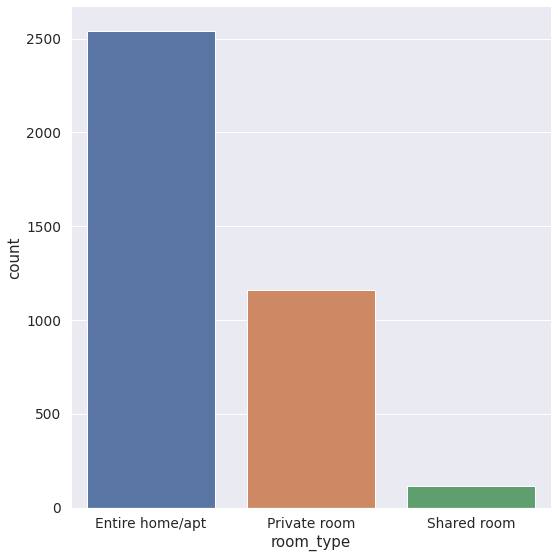

In [ ]:
sns.catplot("room_type" , data=df, kind="count", height=8)

(0.0, 50.0)

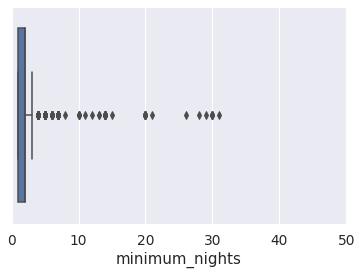

In [ ]:
sns.boxplot(x = df['minimum_nights'])
#plt.xlim(0, 1500)
plt.xlim(0, 50)

In [ ]:
df['price'] = df['price'].str.replace("[$, ]", "").astype("float")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


(-10.0, 1500.0)

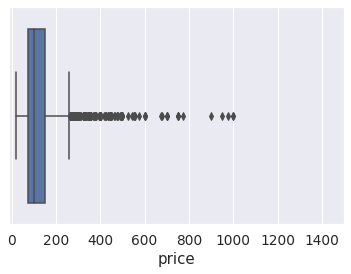

In [ ]:
sns.boxplot(x = df['price'])
plt.xlim(-10, 1500)
#plt.xlim(0, 50)

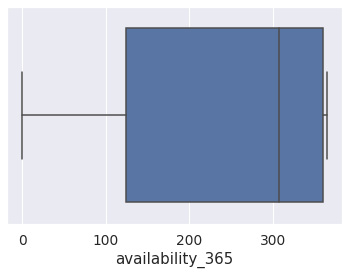

In [ ]:
sns.boxplot(x = df['availability_365'])
#plt.xlim(-10, 1500)


<BarContainer object of 10 artists>

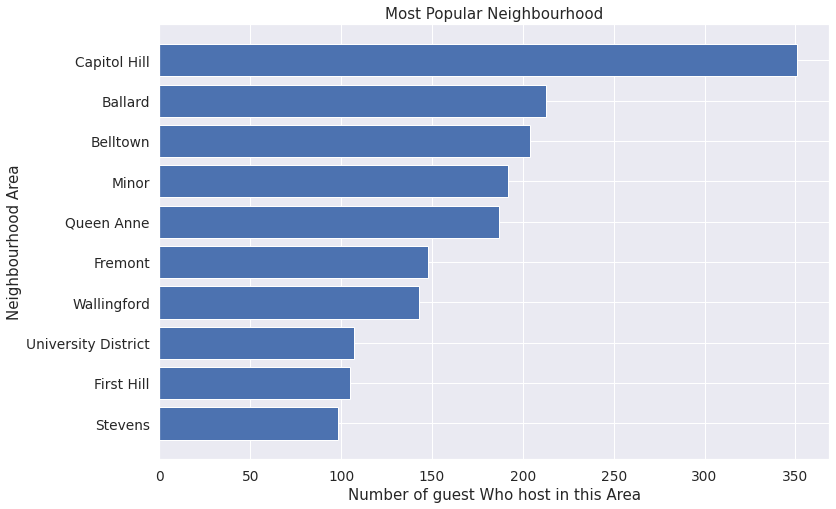

In [ ]:
data = df.neighbourhood.value_counts()[:10]
#print(data)
plt.figure(figsize=(12, 8))
x = list(data.index)
y = list(data.values)
#print(x)
x.reverse()
y.reverse()

plt.title("Most Popular Neighbourhood")
plt.ylabel("Neighbourhood Area")
plt.xlabel("Number of guest Who host in this Area")

plt.barh(x, y)

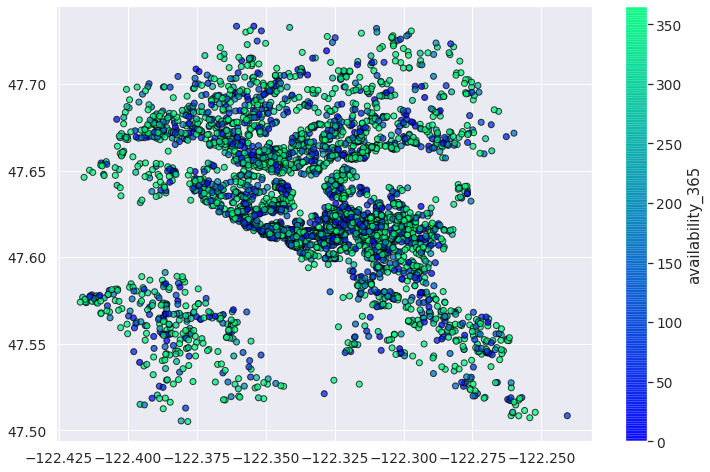

In [ ]:
#Scatter plot: Location(longitude,latitude) vs availability_365
plt.figure(figsize=(12, 8))
plt.scatter(df.longitude, df.latitude, c=df.availability_365, cmap="winter",edgecolor='black', linewidth=1, alpha=0.75)

cbar = plt.colorbar()
cbar.set_label('availability_365')

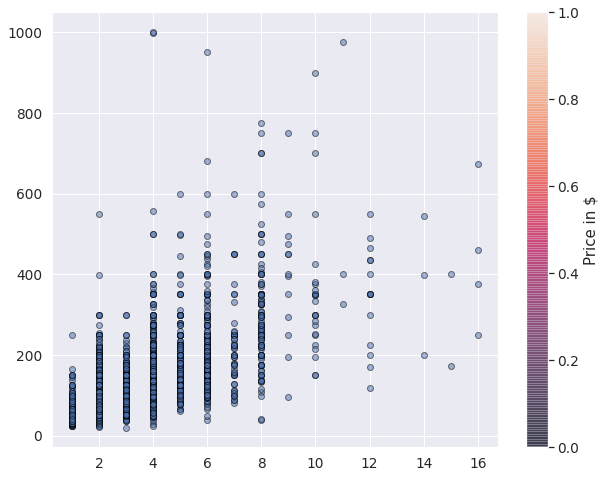

In [ ]:
#Scatter plot: Location(longitude,latitude) vs price
plt.figure(figsize=(10, 8))
plt.scatter(df.accommodates, df.price,  cmap='autumn', edgecolor='black', linewidth=1, alpha=0.5)

cbar = plt.colorbar()
cbar.set_label('Price in $')

In [ ]:
#groupby["neighbourhood"]

In [ ]:
df.rename(columns={'id':'listing_id'}, inplace=True)

In [ ]:
df_reviews['listing_id']


0        7202016
1        7202016
2        7202016
3        7202016
4        7202016
          ...   
84844    3624990
84845    3624990
84846    3624990
84847    3624990
84848    9727246
Name: listing_id, Length: 84849, dtype: int64

In [ ]:
# get estimated bookings base on reviews
df_bookings = pd.merge(df_reviews, df, on='listing_id')
df_bookings['estimated_revenue'] = df_bookings['price'] * df_bookings['minimum_nights']

# get revenue by listings
df_listings_revenue = df_bookings[['listing_id','estimated_revenue']].groupby(['listing_id']).sum()

df_listings = pd.merge(df, df_listings_revenue, on='listing_id', how='left')

df_listings.at[df_listings['estimated_revenue'].isnull(), 'estimated_revenue'] = 0
df_listings.head()

,listing_id,name,description,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,...,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,estimated_revenue
0,241032,Stylish Queen Anne Apartment,Make your self at home in this charming one-be...,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,...,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07,17595.0
1,953595,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,...,f,NaN,WASHINGTON,f,strict,t,t,6,1.48,12900.0
2,3308979,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,16708587,https://www.airbnb.com/users/show/16708587,Jill,2014-06-12,"Seattle, Washington, United States",i love living in Seattle. i grew up in the mi...,within a few hours,...,f,NaN,WASHINGTON,f,strict,f,f,2,1.15,78000.0
3,7421966,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,9851441,https://www.airbnb.com/users/show/9851441,Emily,2013-11-06,"Seattle, Washington, United States",NaN,NaN,...,f,NaN,WASHINGTON,f,flexible,f,f,1,1.15,0.0
4,278830,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,1452570,https://www.airbnb.com/users/show/1452570,Emily,2011-11-29,"Seattle, Washington, United States","Hi, I live in Seattle, Washington but I'm orig...",within an hour,...,f,NaN,WASHINGTON,f,strict,f,f,1,0.89,17100.0


In [ ]:

df_listings.at[df_listings['review_scores_rating'].isnull(), 'review_scores_rating'] = 0
df_listings.at[df_listings['review_scores_accuracy'].isnull(), 'review_scores_accuracy'] = 0
df_listings.at[df_listings['review_scores_cleanliness'].isnull(), 'review_scores_cleanliness'] = 0
df_listings.at[df_listings['review_scores_checkin'].isnull(), 'review_scores_checkin'] = 0
df_listings.at[df_listings['review_scores_communication'].isnull(), 'review_scores_communication'] = 0
df_listings.at[df_listings['review_scores_location'].isnull(), 'review_scores_location'] = 0
df_listings.at[df_listings['review_scores_value'].isnull(), 'review_scores_value'] = 0


Top most correlated columns:
review_scores_value
review_scores_cleanliness
review_scores_accuracy
review_scores_communication
review_scores_checkin
review_scores_location


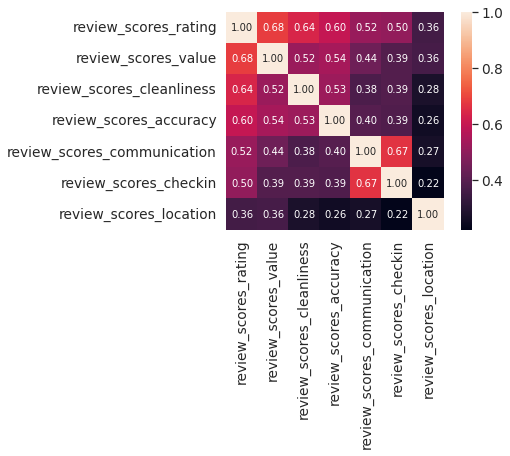

In [ ]:
pd_listings_reviews = df_listings[['review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']]

def plot_topn_correlation_matrix_with_target(df, target_col_name, k=10):
  corrmat = df.corr()
  top_correlated_columns = corrmat.nlargest(k, target_col_name)[target_col_name].index
  cm = np.corrcoef(df[top_correlated_columns].values.T)
  sns.set(font_scale=1.25)
  hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': k}, yticklabels=top_correlated_columns.values, xticklabels=top_correlated_columns.values)
  
  return top_correlated_columns.values

top_correlated_columns = plot_topn_correlation_matrix_with_target(pd_listings_reviews, 'review_scores_rating')

print("Top most correlated columns:")
for i in top_correlated_columns:

  if(i!='review_scores_rating'):
    print(i)

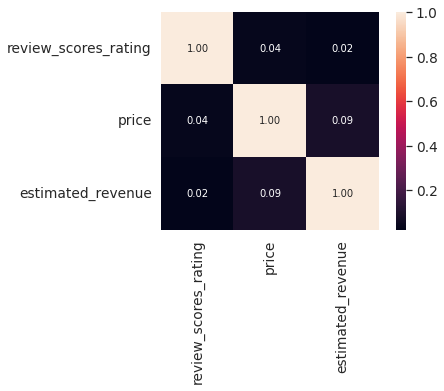

In [ ]:
_ = plot_topn_correlation_matrix_with_target(df_listings[['estimated_revenue','price','review_scores_rating']], 'review_scores_rating')


In [ ]:
df_listings.loc[df_listings['minimum_nights']<=7, ['listing_id','number_of_reviews','minimum_nights','accommodates','bedrooms','beds','estimated_revenue']].sort_values('estimated_revenue', ascending=False).head()

,listing_id,number_of_reviews,minimum_nights,accommodates,bedrooms,beds,estimated_revenue
1070,3385421,31,6,4,2.0,2.0,103602.0
2,3308979,20,4,11,5.0,7.0,78000.0
3667,53803,41,7,4,3.0,3.0,71750.0
1592,9460,240,3,2,1.0,1.0,71280.0
3165,3040278,156,2,4,2.0,2.0,67704.0


                              estimated_revenue
neighbourhood_group_cleansed                   
Downtown                            7247.666038
Capitol Hill                        7064.079365
Beacon Hill                         6606.983051
Ballard                             6078.726087
Queen Anne                          6038.752542
Central Area                        4636.371274
Other neighborhoods                 4409.843829
Cascade                             4075.134831
Seward Park                         4063.500000
Rainier Valley                      3827.345912
Delridge                            3641.189873
Magnolia                            3587.819672
West Seattle                        3370.783251
Northgate                           2962.362500
Lake City                           2476.432836
Interbay                            2105.727273
University District                 1558.557377


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


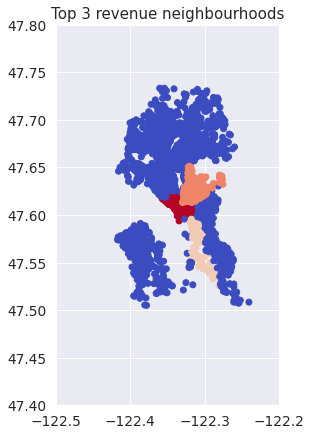

In [ ]:

pd_neighbourhood_revenue = df_listings[['neighbourhood_group_cleansed','estimated_revenue']].groupby(['neighbourhood_group_cleansed']).mean().sort_values('estimated_revenue', ascending=False)
print(pd_neighbourhood_revenue)

pd_listings_plot = df_listings[['neighbourhood_group_cleansed','longitude','latitude','estimated_revenue']]
pd_listings_plot.loc[:,'color'] = 0

color_value = 1
for neighbourhood in pd_neighbourhood_revenue[0:3].index:
  pd_listings_plot.at[pd_listings_plot['neighbourhood_group_cleansed'] == neighbourhood, 'color'] = color_value
  color_value -= 0.2

# plot
plt.figure(figsize=(4, 7))
ax = plt.subplot(1, 1, 1)
ax.set_title("Top 3 revenue neighbourhoods")

ax.set_autoscaley_on(False)
ax.set_ylim([47.4, 47.8])
ax.set_autoscalex_on(False)
ax.set_xlim([-122.5, -122.2])
plt.scatter(pd_listings_plot['longitude'],
            pd_listings_plot['latitude'],
            cmap="coolwarm",
            c=pd_listings_plot['color']
           )

_ = plt.plot()

In [ ]:
#df_reviews['date'].dt.month
df_reviews['date'] = pd.to_datetime(df_reviews['date'])
df_bookings['date'] = pd.to_datetime(df_bookings['date'])


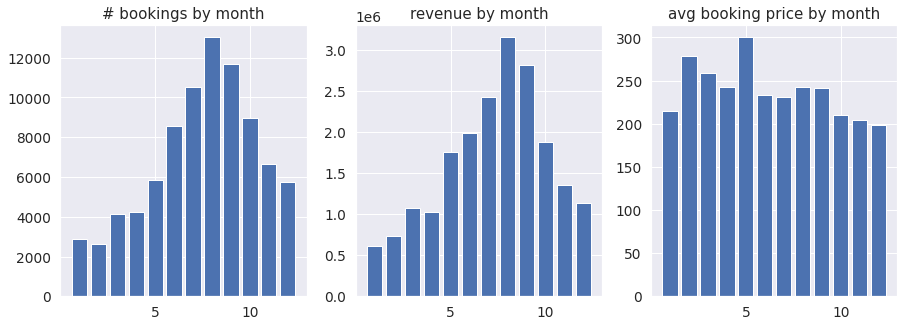

In [ ]:
plt.figure(figsize=(15, 5))

# # bookings by month

plotdata = df_reviews[['date']].groupby(df_reviews["date"].dt.month).count()
plotdata.rename(columns={'date':'# of bookings'}, inplace=True)

ax = plt.subplot(1, 3, 1)
ax.set_title("# bookings by month")
plt.bar(plotdata.index, plotdata['# of bookings'])

# revenue by month
plotdata2 = df_bookings[['date','estimated_revenue']].groupby(df_bookings["date"].dt.month).sum()
plotdata2.rename(columns={'estimated_revenue':'revenue'}, inplace=True)

ax = plt.subplot(1, 3, 2)
ax.set_title("revenue by month")
plt.bar(plotdata2.index, plotdata2['revenue'])

# avg booking price by month
plotdata3 = pd.concat([plotdata, plotdata2], axis=1)
plotdata3['avg booking price'] = plotdata3['revenue'] / plotdata3['# of bookings']
plotdata3.head()

ax = plt.subplot(1, 3, 3)
ax.set_title("avg booking price by month")
plt.bar(plotdata3.index, plotdata3['avg booking price'])

_ = plt.plot()

In [ ]:
rows_amenities = []
rows_listing_id = []

for id, row in df.loc[:, ['listing_id','amenities']].iterrows():
  rows_listing_id.append(row['listing_id'])
  
  row_amenities = {}
  amenities = row['amenities'].strip('{}')
  for amenity in amenities.split(','):
    row_amenities[amenity.strip('"')] = 1
  rows_amenities.append(row_amenities)

pd_listings_amenities = pd.DataFrame(rows_amenities, index=rows_listing_id)
pd_listings_amenities = pd_listings_amenities.fillna(0)
pd_listings_amenities.drop('', axis=1, inplace=True)
pd_listings_amenities['listing_id'] = pd_listings_amenities.index
pd_listings_amenities = pd.merge(pd_listings_amenities, df[['listing_id','number_of_reviews']], on='listing_id')

pd_rows_amenities = pd_listings_amenities.sum(axis=0)

pd_amenities_count = pd.DataFrame({'amenities':pd_rows_amenities.index, 'count':pd_rows_amenities.values})
pd_amenities_count = pd_amenities_count.sort_values('count', ascending=False)[:10]

pd_amenities_count.drop(41, axis=0, inplace=True) # drop listing_id
pd_amenities_count.drop(42, axis=0, inplace=True) # drop number_of_reviews
pd_amenities_count

,amenities,count
3,Wireless Internet,3667.0
6,Heating,3627.0
5,Kitchen,3423.0
12,Smoke Detector,3281.0
17,Essentials,3237.0
9,Dryer,2997.0
8,Washer,2992.0
2,Internet,2811.0
